# Countplot

make a barchart out of categories using countplot - implies it counts

In [1]:
# Let's import the required packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
sns.set(style="darkgrid")

In [2]:

titanic = pd.read_csv('./titanic.csv')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='sex', ylabel='count'>

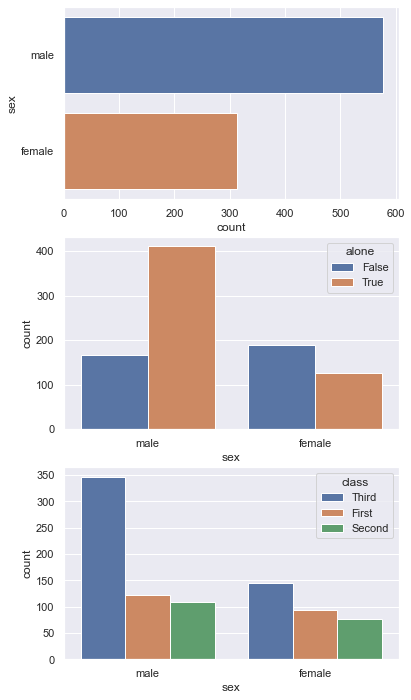

In [3]:
'''
 count number of male and female passengers
and grouping

'''

fig, axes = plt.subplots(3, figsize=(6,12))

sns.countplot(y='sex', data=titanic, ax=axes[0])
sns.countplot(x='sex', data=titanic, ax=axes[1], hue='alone')
sns.countplot(x='sex', data=titanic, ax=axes[2], hue='class')

 similar charts without seaborn.
 prepare the dataframe first and then plot

In [4]:
gender_df = titanic.sex.value_counts()

gender_df

male      577
female    314
Name: sex, dtype: int64

<AxesSubplot:>

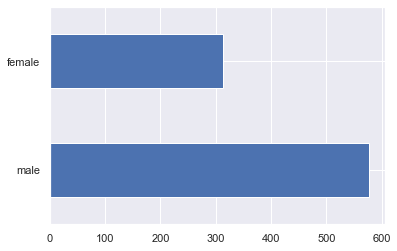

In [5]:
fig, ax = plt.subplots()
gender_df.plot.barh(rot=0, ax=ax)

<AxesSubplot:xlabel='sex'>

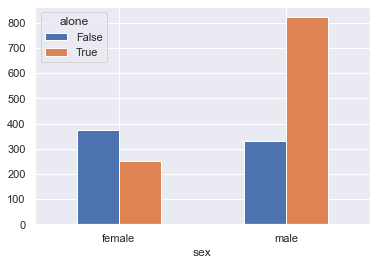

In [8]:
# how about we recreate a 2nd one
import numpy as np

fig, ax = plt.subplots()
df2 = titanic[['alone', 'sex']].groupby(['sex','alone']).agg(np.size).unstack()

df2.plot.bar(rot=0, ax=ax)

In [9]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - An array or li